In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the test dataset
test_data = pd.read_csv('test.csv')

# Display basic information about the dataset
test_data.info()

# Display the first few rows of the dataset
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
# Check for missing values in each column
missing_values = test_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Summary statistics for numeric variables
test_data.describe()

# Summary statistics for categorical variables
categorical_columns = test_data.select_dtypes(include=['object']).columns
test_data[categorical_columns].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


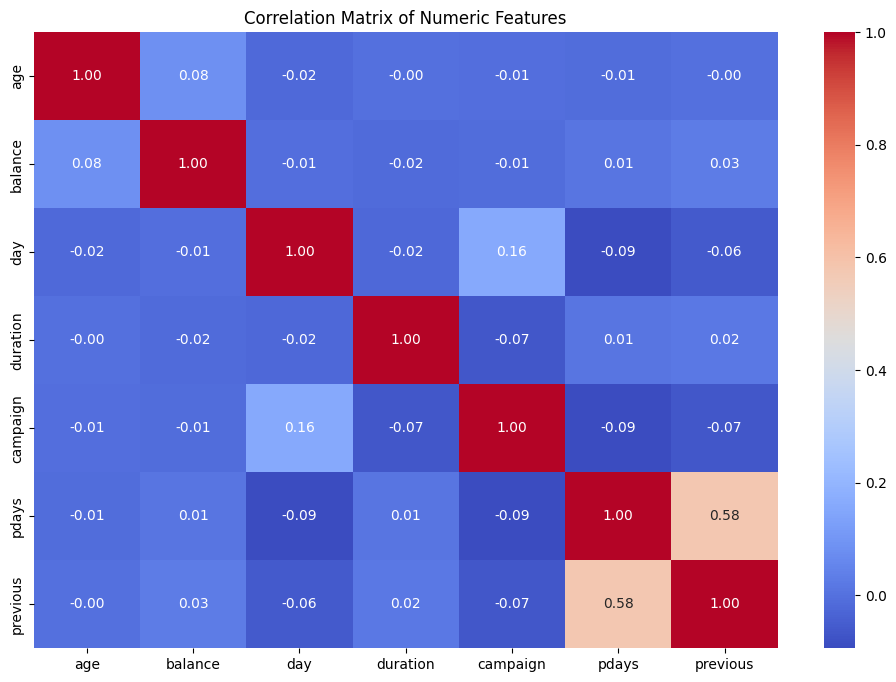

In [ ]:
# Selecting only numeric columns
numeric_columns = test_data.select_dtypes(include=['int64', 'float64']).columns

# Calculating correlation matrix only for numeric columns
correlation_matrix = test_data[numeric_columns].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

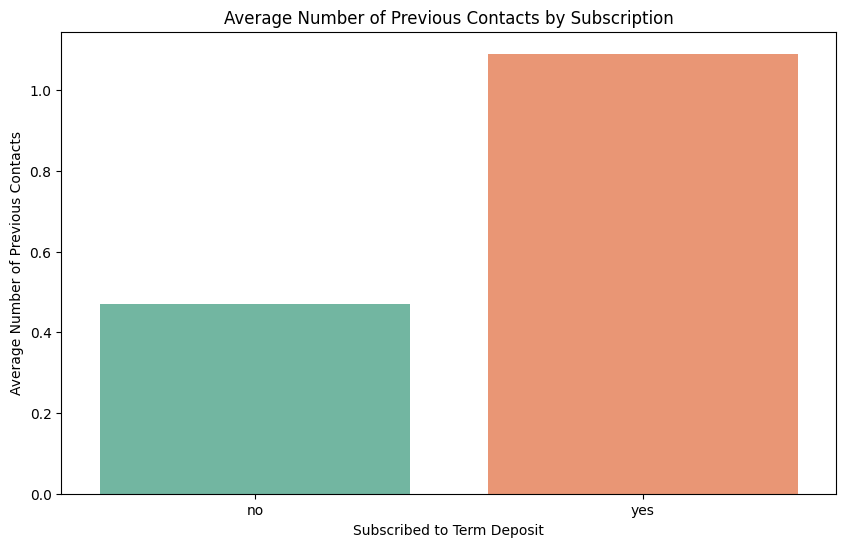

In [ ]:
# Bar plot for 'previous' vs. 'y'
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='previous', data=test_data, ci=None, palette='Set2')
plt.title('Average Number of Previous Contacts by Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Average Number of Previous Contacts')
plt.show()

Customers who subscribed to the term deposit had, on average, more previous contacts compared to those who did not subscribe. This suggests that repeated engagements or follow-ups through previous campaigns increase the likelihood of a customer subscribing.

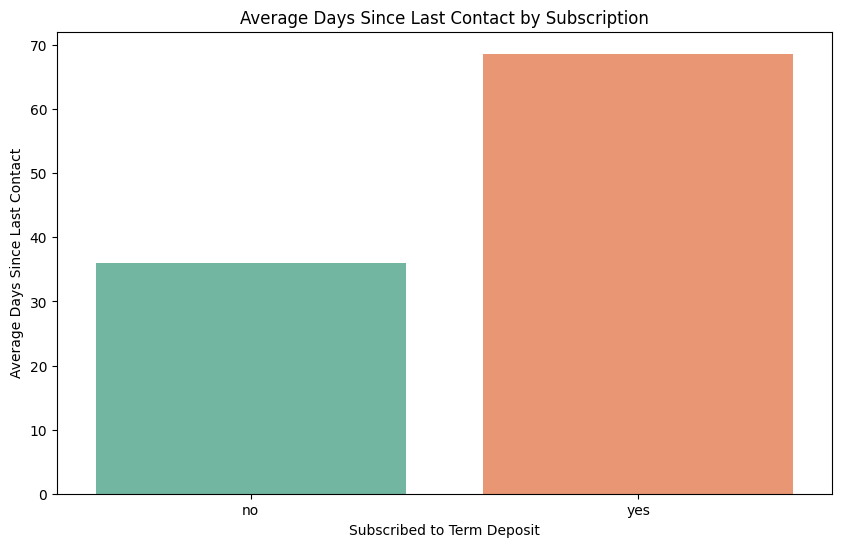

In [ ]:
# Bar plot for 'pdays' vs. 'y'
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='pdays', data=test_data, ci=None, palette='Set2')
plt.title('Average Days Since Last Contact by Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Average Days Since Last Contact')
plt.show()

Customers who subscribed to the term deposit had a longer average time since their last contact compared to non-subscribers. This indicates that giving customers a longer break between contacts might reduce customer fatigue and improve the chances of subscription.

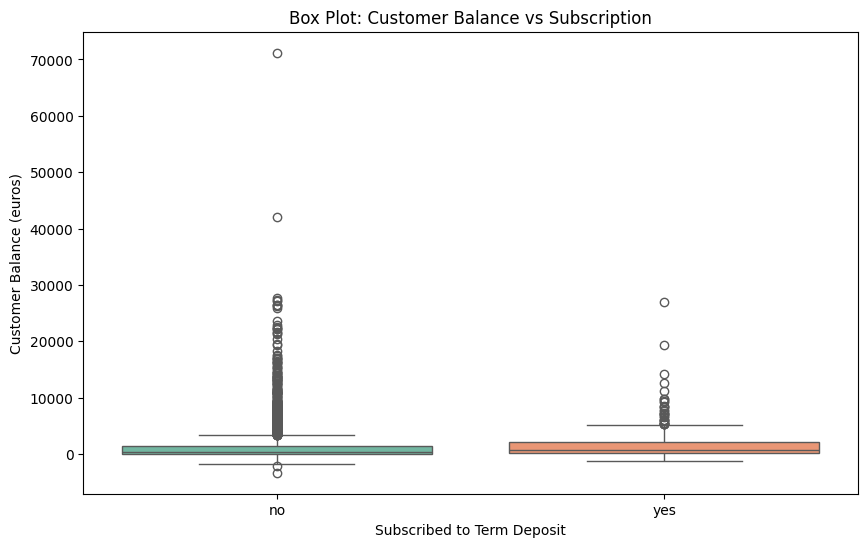

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=test_data, palette='Set2')
plt.title('Box Plot: Customer Balance vs Subscription')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Customer Balance (euros)')
plt.show()

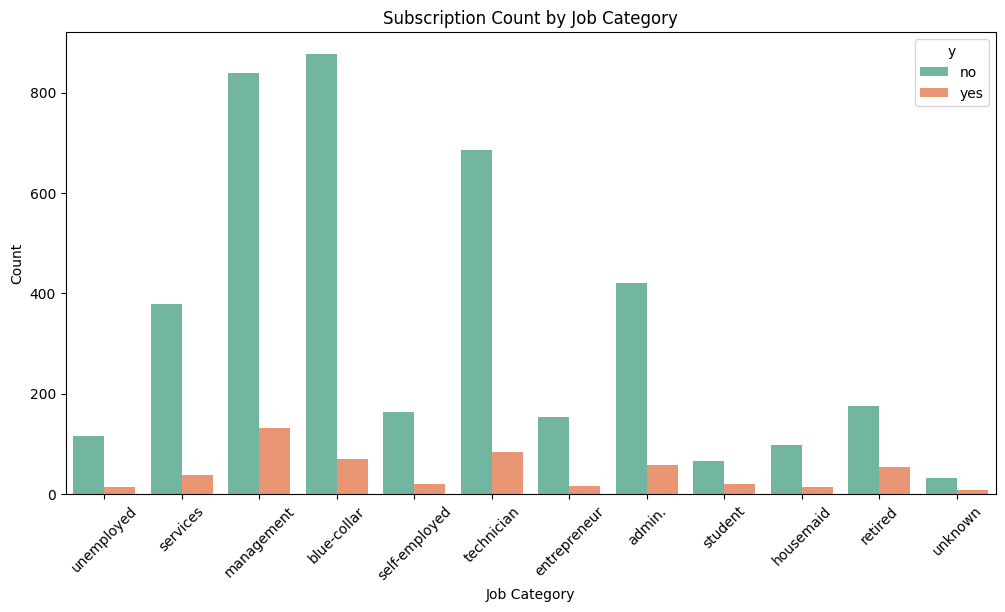

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=test_data, palette='Set2')
plt.title('Subscription Count by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

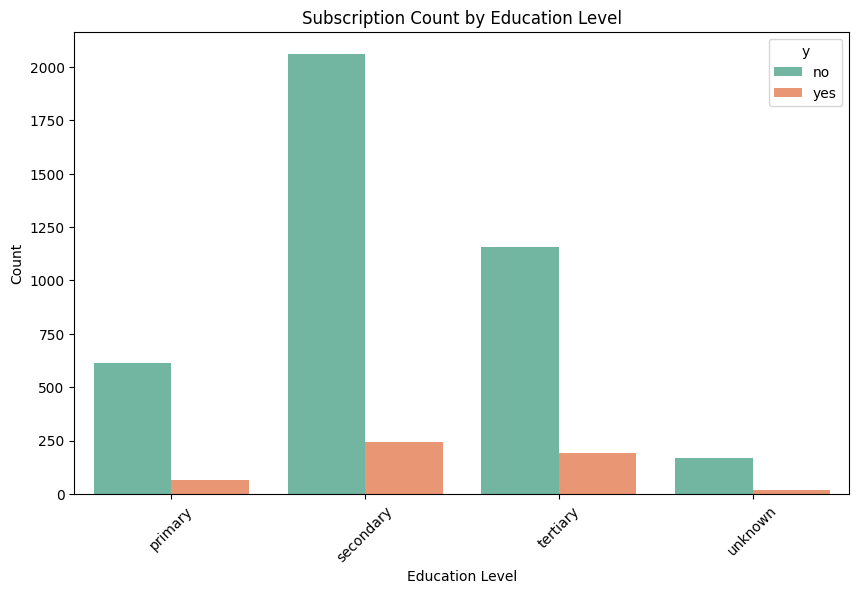

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=test_data, palette='Set2')
plt.title('Subscription Count by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

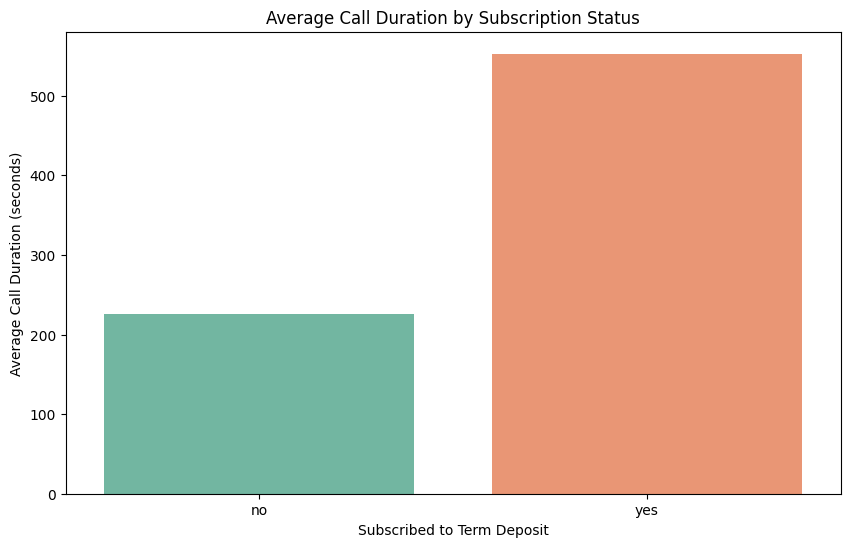

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='duration', data=test_data, palette='Set2', ci=None)
plt.title('Average Call Duration by Subscription Status')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Average Call Duration (seconds)')
plt.show()

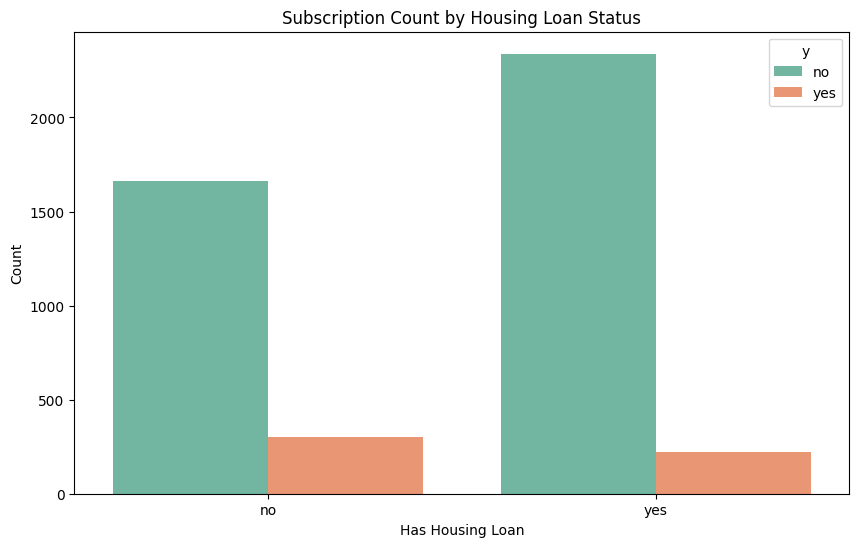

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='housing', hue='y', data=test_data, palette='Set2')
plt.title('Subscription Count by Housing Loan Status')
plt.xlabel('Has Housing Loan')
plt.ylabel('Count')
plt.show()


# House loan summary

Customers without housing loans are slightly more likely to subscribe to a term deposit compared to those with housing loans. It seems that people who aren’t tied down by a mortgage may be more open to new investment opportunities.

This suggests that when planning telemarketing campaigns, it might be more effective to focus on customers without housing loans, as they could be more receptive to offers.

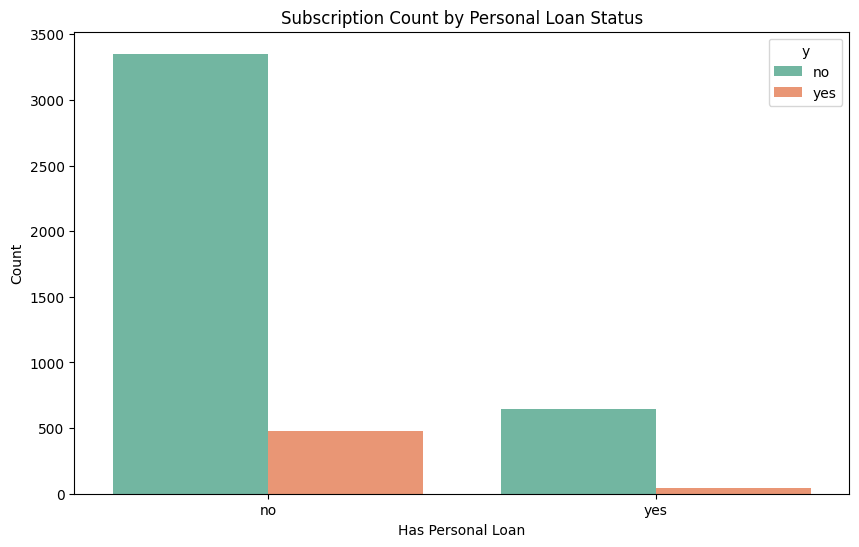

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='loan', hue='y', data=test_data, palette='Set2')
plt.title('Subscription Count by Personal Loan Status')
plt.xlabel('Has Personal Loan')
plt.ylabel('Count')
plt.show()

# Personal Loan summary

Customers without personal loans are much more likely to subscribe compared to those who have personal loans. This could be because customers with personal loans might already be managing debt and aren’t looking to invest more money

Focusing on customers without personal loans could lead to better conversion rates. It’s probably a good idea to avoid pushing new financial products to those already dealing with loan repayments.